In [1]:
import matplotlib.pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True' # needed to run on mac os 

from sklearn import datasets
digits = datasets.load_digits()

The input layer requires a 1-dimensional array in input, but our images are 2D. So we need to flatten all images:

In [2]:
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

We now have 1797 flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension by  writing the rows of 8 pixels as they come, one after the other. The first image that we looked at earlier is now represented by a 1-D array with 8x8 = 64 slots. Please check that the values below are the same as in the original 2-D image. 

In [3]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
from keras import backend

Using TensorFlow backend.


One-hot encoding: 

In [5]:
import numpy as np
y = np.zeros((len(digits.target), 10))
y[np.arange(len(digits.target)), digits.target] = 1
print y.shape
print y

(1797, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


Can also be done more easily like this: 

In [130]:
from keras.utils import np_utils

In [133]:
y = np_utils.to_categorical(digits.target,10)
print y

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


let's now split our data into a training sample and a testing sample:

In [223]:
split_limit=1000
x_train = x[:split_limit]
y_train = y[:split_limit]
x_test = x[split_limit:]
y_test = y[split_limit:]

The first 1000 images and labels are going to be used for training. The rest of the dataset will be used later to test the performance of our network. 

We can now create the neural network. We use one hidden layers with 15 neurons. The output layer must have exactly 10 neurons because we want to classify our digits in 10 categories. Don't pay attention to the other parameters, we'll cover that in future posts.

In [224]:
from keras import layers, Model, optimizers, regularizers

In [237]:
img_input = layers.Input(shape=(64,))
tmp = layers.Dense(10, activation='sigmoid')(img_input)
output = layers.Dense(10, activation='sigmoid')(tmp)
model = Model(img_input, output)
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.1, momentum=0.9),
              metrics=['accuracy'])

l2_rate = 1e-4
for layer in model.layers:
    if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer = regularizers.l2(l2_rate)
        layer.bias_regularizer = regularizers.l2(l2_rate)
        layer.activity_regularizer = regularizers.l2(l2_rate)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_71 (Dense)             (None, 10)                110       
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


In [238]:
history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),
                    batch_size=200, epochs=200)

Train on 1000 samples, validate on 797 samples
Epoch 1/200
1000/1000 [==============================] - 1s 1ms/step - loss: 2.3179 - acc: 0.0600 - val_loss: 2.2598 - val_acc: 0.1079
Epoch 2/200
1000/1000 [==============================] - 0s 18us/step - loss: 2.2268 - acc: 0.1290 - val_loss: 2.1914 - val_acc: 0.2233
Epoch 3/200
1000/1000 [==============================] - 0s 18us/step - loss: 2.1432 - acc: 0.3020 - val_loss: 2.1322 - val_acc: 0.3651
Epoch 4/200
1000/1000 [==============================] - 0s 19us/step - loss: 2.0797 - acc: 0.4260 - val_loss: 2.0665 - val_acc: 0.4191
Epoch 5/200
1000/1000 [==============================] - 0s 18us/step - loss: 2.0134 - acc: 0.4940 - val_loss: 1.9952 - val_acc: 0.4567
Epoch 6/200
1000/1000 [==============================] - 0s 20us/step - loss: 1.9400 - acc: 0.5120 - val_loss: 1.9122 - val_acc: 0.4630
Epoch 7/200
1000/1000 [==============================] - 0s 20us/step - loss: 1.8503 - acc: 0.5160 - val_loss: 1.8185 - val_acc: 0.5207
Ep

1000/1000 [==============================] - 0s 16us/step - loss: 0.1192 - acc: 0.9890 - val_loss: 0.5134 - val_acc: 0.8683
Epoch 61/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.1201 - acc: 0.9870 - val_loss: 0.5029 - val_acc: 0.8683
Epoch 62/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.1144 - acc: 0.9900 - val_loss: 0.5039 - val_acc: 0.8645
Epoch 63/200
1000/1000 [==============================] - 0s 16us/step - loss: 0.1130 - acc: 0.9870 - val_loss: 0.4957 - val_acc: 0.8745
Epoch 64/200
1000/1000 [==============================] - 0s 16us/step - loss: 0.1092 - acc: 0.9890 - val_loss: 0.5085 - val_acc: 0.8683
Epoch 65/200
1000/1000 [==============================] - 0s 16us/step - loss: 0.1086 - acc: 0.9890 - val_loss: 0.4953 - val_acc: 0.8683
Epoch 66/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.1077 - acc: 0.9890 - val_loss: 0.4960 - val_acc: 0.8733
Epoch 67/200
1000/1000 [==============================

Epoch 120/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.0548 - acc: 0.9960 - val_loss: 0.5178 - val_acc: 0.8645
Epoch 121/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.0544 - acc: 0.9960 - val_loss: 0.5171 - val_acc: 0.8670
Epoch 122/200
1000/1000 [==============================] - 0s 16us/step - loss: 0.0536 - acc: 0.9960 - val_loss: 0.5175 - val_acc: 0.8695
Epoch 123/200
1000/1000 [==============================] - 0s 16us/step - loss: 0.0535 - acc: 0.9960 - val_loss: 0.5248 - val_acc: 0.8670
Epoch 124/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.0529 - acc: 0.9960 - val_loss: 0.5240 - val_acc: 0.8683
Epoch 125/200
1000/1000 [==============================] - 0s 16us/step - loss: 0.0524 - acc: 0.9960 - val_loss: 0.5243 - val_acc: 0.8657
Epoch 126/200
1000/1000 [==============================] - 0s 16us/step - loss: 0.0520 - acc: 0.9960 - val_loss: 0.5238 - val_acc: 0.8657
Epoch 127/200
1000/1000 [=========

1000/1000 [==============================] - 0s 18us/step - loss: 0.0376 - acc: 0.9960 - val_loss: 0.5548 - val_acc: 0.8570
Epoch 180/200
1000/1000 [==============================] - 0s 18us/step - loss: 0.0375 - acc: 0.9960 - val_loss: 0.5565 - val_acc: 0.8595
Epoch 181/200
1000/1000 [==============================] - 0s 18us/step - loss: 0.0374 - acc: 0.9960 - val_loss: 0.5460 - val_acc: 0.8632
Epoch 182/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.0373 - acc: 0.9960 - val_loss: 0.5606 - val_acc: 0.8570
Epoch 183/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.0371 - acc: 0.9960 - val_loss: 0.5503 - val_acc: 0.8620
Epoch 184/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.0373 - acc: 0.9960 - val_loss: 0.5564 - val_acc: 0.8595
Epoch 185/200
1000/1000 [==============================] - 0s 17us/step - loss: 0.0368 - acc: 0.9960 - val_loss: 0.5627 - val_acc: 0.8595
Epoch 186/200
1000/1000 [=======================

In [239]:
predictions = model.predict(x_test)

prediction: 2 	true value: 1


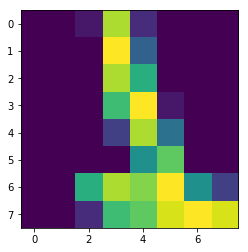

In [240]:
img = x_test[0].reshape(8,8)
plt.imshow(img)
print 'prediction:', np.argmax(predictions[0]), '\ttrue value:', np.argmax(y_test[0])

In [241]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')

    plt.figure()

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.show()
    


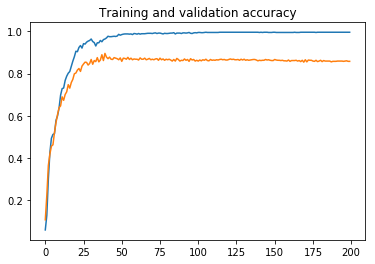

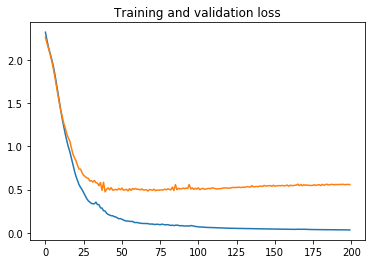

In [242]:
plot_history(history)

In [176]:
y_test_best = np.argmax(y_test,1)
predictions_best = np.argmax(predictions,1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_best, predictions_best)

0.8518518518518519